# **Groupby():**

Group DataFrame using a mapper or by a Series of columns.

groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

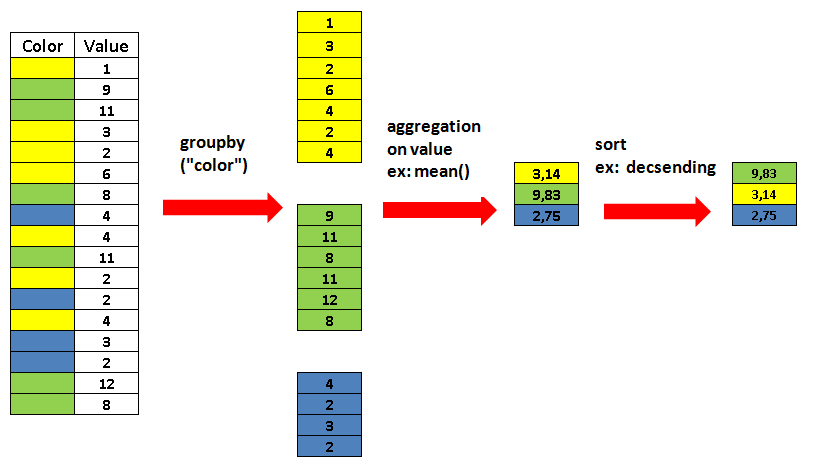

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")
df.shape

(244, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.rename(columns={"total_bill":"bill","sex":"gender"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   bill    244 non-null    float64 
 1   tip     244 non-null    float64 
 2   gender  244 non-null    category
 3   smoker  244 non-null    category
 4   day     244 non-null    category
 5   time    244 non-null    category
 6   size    244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df["gender"].value_counts()

,count
gender,
Male,157
Female,87


In [10]:
# groupby() single variable.
df.groupby("gender").count()

/tmp/ipython-input-2926072786.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("gender")


In [11]:
# Accwssing specific group (Female)
# get_group(): It is used with pandas groupby objects
# get_group(value) lets you extract one particular group from it.
g=df.groupby("gender")
df_female=g.get_group("Female")
df_female.shape

/tmp/ipython-input-4278683248.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g=df.groupby("gender")


(87, 7)

In [12]:
df_female.head()

,bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [13]:
# Let us access the male group
df_male = g.get_group("Male")
df_male.shape

(157, 7)

In [14]:
df_male.head()

,bill,tip,gender,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   bill    244 non-null    float64 
 1   tip     244 non-null    float64 
 2   gender  244 non-null    category
 3   smoker  244 non-null    category
 4   day     244 non-null    category
 5   time    244 non-null    category
 6   size    244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
df["smoker"].value_counts()

,count
smoker,
No,151
Yes,93


In [17]:
df["time"].value_counts()

,count
time,
Dinner,176
Lunch,68


In [19]:
# Let us group the data based on smoker column
df.groupby("smoker").count()

/tmp/ipython-input-4187006557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("smoker").count()


,bill,tip,gender,day,time,size
smoker,,,,,,
Yes,93,93,93,93,93,93
No,151,151,151,151,151,151


In [20]:
g2=df.groupby("smoker")
g2.get_group("Yes")

/tmp/ipython-input-841300241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g2=df.groupby("smoker")


,bill,tip,gender,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [21]:
g2.get_group("No")

,bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
df.groupby("day").count()

/tmp/ipython-input-3420989895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("day").count()


,bill,tip,gender,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [23]:
df.groupby("smoker").count()

/tmp/ipython-input-575986796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("smoker").count()


,bill,tip,gender,day,time,size
smoker,,,,,,
Yes,93,93,93,93,93,93
No,151,151,151,151,151,151


In [24]:
df.groupby("time").count()

/tmp/ipython-input-3675600372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("time").count()


,bill,tip,gender,smoker,day,size
time,,,,,,
Lunch,68,68,68,68,68,68
Dinner,176,176,176,176,176,176


In [27]:
# groupby multiple variables.
df.groupby(["gender","smoker"]).count()

/tmp/ipython-input-573128556.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["gender","smoker"]).count()


bill  tip  day  time  size
gender smoker                            
Male   Yes       60   60   60    60    60
       No        97   97   97    97    97
Female Yes       33   33   33    33    33
       No        54   54   54    54    54

In [26]:
df.groupby(["smoker","gender"]).count()

/tmp/ipython-input-833879569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["smoker","gender"]).count()


bill  tip  day  time  size
smoker gender                            
Yes    Male      60   60   60    60    60
       Female    33   33   33    33    33
No     Male      97   97   97    97    97
       Female    54   54   54    54    54

In [28]:
df.groupby(["gender","smoker","day"]).count()

/tmp/ipython-input-2941265289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["gender","smoker","day"]).count()


bill  tip  time  size
gender smoker day                        
Male   Yes    Thur    10   10    10    10
              Fri      8    8     8     8
              Sat     27   27    27    27
              Sun     15   15    15    15
       No     Thur    20   20    20    20
              Fri      2    2     2     2
              Sat     32   32    32    32
              Sun     43   43    43    43
Female Yes    Thur     7    7     7     7
              Fri      7    7     7     7
              Sat     15   15    15    15
              Sun      4    4     4     4
       No     Thur    25   25    25    25
              Fri      2    2     2     2
              Sat     13   13    13    13
              Sun     14   14    14    14

In [29]:
g2=df.groupby(["gender","smoker","day"])

/tmp/ipython-input-3622937792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g2=df.groupby(["gender","smoker","day"])


In [30]:
df.groupby(["gender","smoker","day","time"]).count()

/tmp/ipython-input-2898900105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["gender","smoker","day","time"]).count()


bill  tip  size
gender smoker day  time                   
Male   Yes    Thur Lunch     10   10    10
                   Dinner     0    0     0
              Fri  Lunch      3    3     3
                   Dinner     5    5     5
              Sat  Lunch      0    0     0
                   Dinner    27   27    27
              Sun  Lunch      0    0     0
                   Dinner    15   15    15
       No     Thur Lunch     20   20    20
                   Dinner     0    0     0
              Fri  Lunch      0    0     0
                   Dinner     2    2     2
              Sat  Lunch      0    0     0
                   Dinner    32   32    32
              Sun  Lunch      0    0     0
                   Dinner    43   43    43
Female Yes    Thur Lunch      7    7     7
                   Dinner     0    0     0
              Fri  Lunch      3    3     3
                   Dinner     4    4     4
              Sat  Lunch      0    0     0
                   Dinner    15   15    15
              Sun  Lunch      0    0     0
                   Dinner     4    4     4
       No     Thur Lunch     24   24    24
                   Dinner     1    1     1
              Fri  Lunch      1    1     1
                   Dinner     1    1     1
              Sat  Lunch      0    0     0
                   Dinner    13   13    13
              Sun  Lunch      0    0     0
                   Dinner    14   14    14

In [31]:
df.groupby("smoker").count()

/tmp/ipython-input-575986796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("smoker").count()


,bill,tip,gender,day,time,size
smoker,,,,,,
Yes,93,93,93,93,93,93
No,151,151,151,151,151,151


# **groupby() - dictionary form**

Syntax:

df.groupby('col').agg({
    'column1': ['func1', 'func2'],
    'column2': ['func3']
})

It tells python that on column1 apply func1 and func2, on column2 apply func3

In [32]:
# Applying Statistical/Math Functions on a group
group= df.groupby('smoker').agg({'size': ['sum', 'count',"mean"]})
print(group)

       size                
        sum count      mean
smoker                     
Yes     224    93  2.408602
No      403   151  2.668874


/tmp/ipython-input-608991500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group= df.groupby('smoker').agg({'size': ['sum', 'count',"mean"]})


In [33]:
group= df.groupby('smoker').agg({'tip': ['sum', 'count',"mean","min","max"]})
print(group)

           tip                           
           sum count      mean  min   max
smoker                                   
Yes     279.81    93  3.008710  1.0  10.0
No      451.77   151  2.991854  1.0   9.0


/tmp/ipython-input-2464154140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group= df.groupby('smoker').agg({'tip': ['sum', 'count',"mean","min","max"]})


In [34]:
group= df.groupby('smoker').agg({'bill': ['sum', 'count',"mean"]})
print(group)

           bill                 
            sum count       mean
smoker                          
Yes     1930.34    93  20.756344
No      2897.43   151  19.188278


/tmp/ipython-input-4020923338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group= df.groupby('smoker').agg({'bill': ['sum', 'count',"mean"]})


In [35]:
# generate summary of day column with respect to bill ---> [mean,sum], tip ---> [[min,max]
group= df.groupby('day').agg({'bill': ['sum',"mean"],'tip':["min","max"]})
print(group)

         bill              tip       
          sum       mean   min    max
day                                  
Thur  1096.33  17.682742  1.25   6.70
Fri    325.88  17.151579  1.00   4.73
Sat   1778.40  20.441379  1.00  10.00
Sun   1627.16  21.410000  1.01   6.50


/tmp/ipython-input-1672976393.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group= df.groupby('day').agg({'bill': ['sum',"mean"],'tip':["min","max"]})


# **groupby() - list form**

Syntax:

df.groupby('col')['col1'].agg(['func1', 'func2','func3'])

It tells python that apply func1, func2 and func3 on numerical columns

In [37]:
df.groupby('smoker')['tip'].agg(['sum', 'count', 'mean'])

/tmp/ipython-input-2872245393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['tip'].agg(['sum', 'count', 'mean'])


,sum,count,mean
smoker,,,
Yes,279.81,93,3.008710
No,451.77,151,2.991854


In [38]:
# accessing nth row from a group
g=df.groupby("gender")
g.get_group("Male")

/tmp/ipython-input-3027891203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g=df.groupby("gender")


,bill,tip,gender,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [39]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
g=df.groupby("gender")
g.get_group("Male")

,bill,tip,gender,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [45]:
g.get_group("Female")

,bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [42]:
g.get_group("Male")

,bill,tip,gender,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [43]:
print(g.head()) # 5 records from each group


     bill   tip  gender smoker  day    time  size
0   16.99  1.01  Female     No  Sun  Dinner     2
1   10.34  1.66    Male     No  Sun  Dinner     3
2   21.01  3.50    Male     No  Sun  Dinner     3
3   23.68  3.31    Male     No  Sun  Dinner     2
4   24.59  3.61  Female     No  Sun  Dinner     4
5   25.29  4.71    Male     No  Sun  Dinner     4
6    8.77  2.00    Male     No  Sun  Dinner     2
11  35.26  5.00  Female     No  Sun  Dinner     4
14  14.83  3.02  Female     No  Sun  Dinner     2
16  10.33  1.67  Female     No  Sun  Dinner     3


In [48]:
# nth() is used with groupby to get the n-th row from each group.
g.nth(1)

,bill,tip,gender,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
g.nth(2)

,bill,tip,gender,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4


# **Cross_Tab (Cross Tabulation):**

In [50]:
df.head()

,bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
pd.crosstab(df["gender"],df["smoker"])

smoker,Yes,No
gender,,
Male,60,97
Female,33,54


In [52]:
pd.crosstab(df["gender"],df["smoker"],normalize=True)
# normalize=True: It converts counts into proportions (percentages in decimal form).
# every cell value is divided by 244 i.e. total number of records in dataframe

smoker,Yes,No
gender,,
Male,0.245902,0.397541
Female,0.135246,0.221311


In [44]:
pd.crosstab(df["gender"],df["day"])

day,Thur,Fri,Sat,Sun
gender,,,,
Male,30,10,59,58
Female,32,9,28,18
